pip install ipykernel
python -m ipykernel install --user --name=mlenv --display-name "Python (mlenv)"
restart VSC
jupyter kernelspec list

KModes

pip install kmodes


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull
import numpy as np

In [ ]:
# Step 1: Load the structured dataset
df = pd.read_csv("kmode-clusters.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Color   90 non-null     object
 1   Shape   90 non-null     object
 2   Brand   90 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [59]:
X = df[['Color', 'Shape', 'Brand']]

In [60]:
# Step 3: Elbow method - compute cost for K=1 to 10
costs = []
K_range = range(1, 11)
for k in K_range:
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    km.fit(X)
    costs.append(km.cost_)

elbow_df = pd.DataFrame({"K": list(K_range), "Cost": costs})
elbow_df["Drop"] = elbow_df["Cost"].shift(1) - elbow_df["Cost"]
elbow_df["% Drop"] = elbow_df["Drop"] / elbow_df["Cost"].shift(1) * 100
elbow_df.fillna(0, inplace=True)
print("\n📉 Elbow Table:\n", elbow_df)


📉 Elbow Table:
     K   Cost  Drop  % Drop
0   1  180.0   0.0     0.0
1   2   90.0  90.0    50.0
2   3    0.0  90.0   100.0
3   4    0.0   0.0     0.0
4   5    0.0   0.0     0.0
5   6    0.0   0.0     0.0
6   7    0.0   0.0     0.0
7   8    0.0   0.0     0.0
8   9    0.0   0.0     0.0
9  10    0.0   0.0     0.0


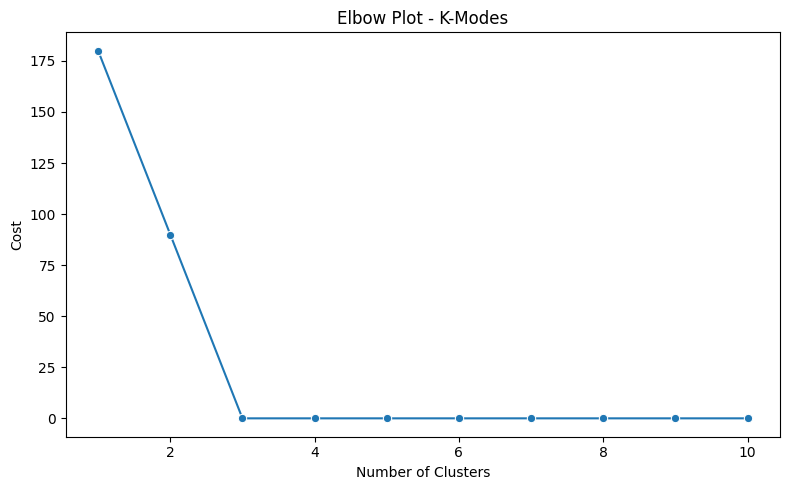

In [61]:

# Step 4: Plot Elbow
plt.figure(figsize=(8, 5))
sns.lineplot(data=elbow_df, x="K", y="Cost", marker="o")
plt.title("Elbow Plot - K-Modes")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.tight_layout()
plt.savefig("elbow_plot_kmodes_easy.png")
plt.show()


In [62]:
# Step 5: Fit K-Modes with optimal K = 3
optimal_k = 3
km = KModes(n_clusters=optimal_k, init='Cao', n_init=5, verbose=0)
df["Pred_Cluster"] = km.fit_predict(X)
df.head()
# # Step 6: Evaluate
# sil_score = silhouette_score(X_encoded, df["Pred_Cluster"])
# print(f"\n🧭 Silhouette Score (Ordinal Encoded): {sil_score:.4f}")
# print("\n📊 Cluster Sizes:\n", df["Pred_Cluster"].value_counts().sort_index())
# print("\n📌 Cluster Modes:\n", pd.DataFrame(km.cluster_centroids_, columns=X.columns))

,Color,Shape,Brand,Pred_Cluster
0,Red,Circle,A,2
1,Red,Circle,A,2
2,Red,Circle,A,2
3,Red,Circle,A,2
4,Red,Circle,A,2


C:\Users\Admin\AppData\Local\Temp\ipykernel_7428\981232786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pred_Cluster', data=df, palette='tab10')


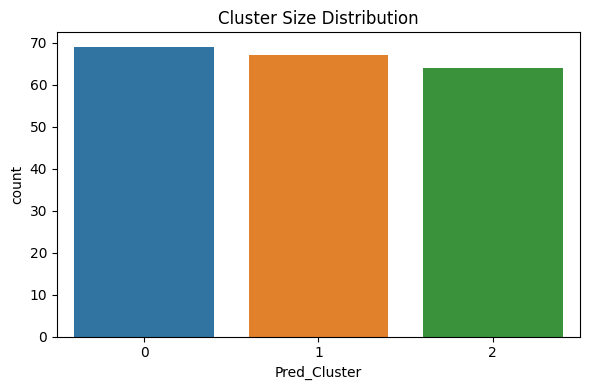

In [50]:
# Step 7: Cluster size bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Pred_Cluster', data=df, palette='tab10')
plt.title("Cluster Size Distribution")
plt.tight_layout()
plt.savefig("cluster_size_distribution_easy.png")
plt.show()

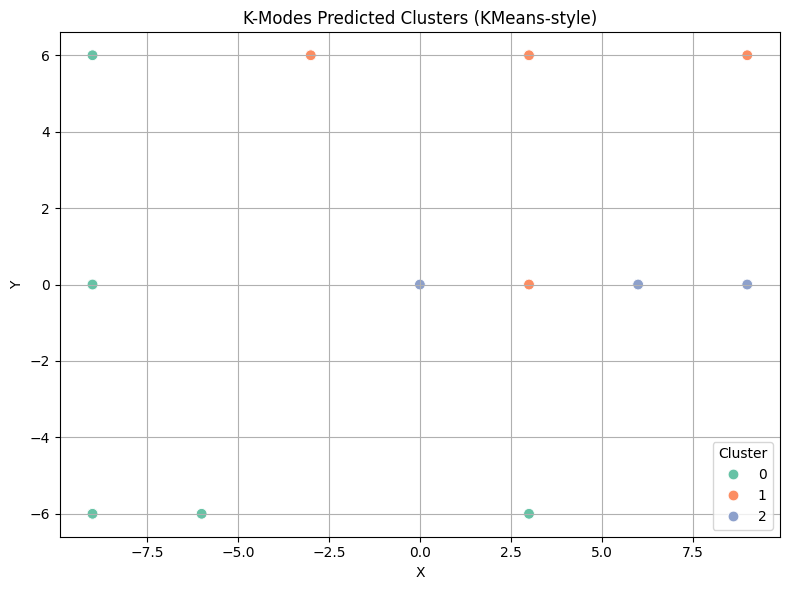

In [53]:
# Use same synthetic X and Y
# (Already mapped Color & Size into X, Shape into Y)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='Y', hue='Cluster', palette='Set2', s=60)
plt.title("K-Modes Predicted Clusters (KMeans-style)")
plt.grid(True)
plt.tight_layout()
plt.show()



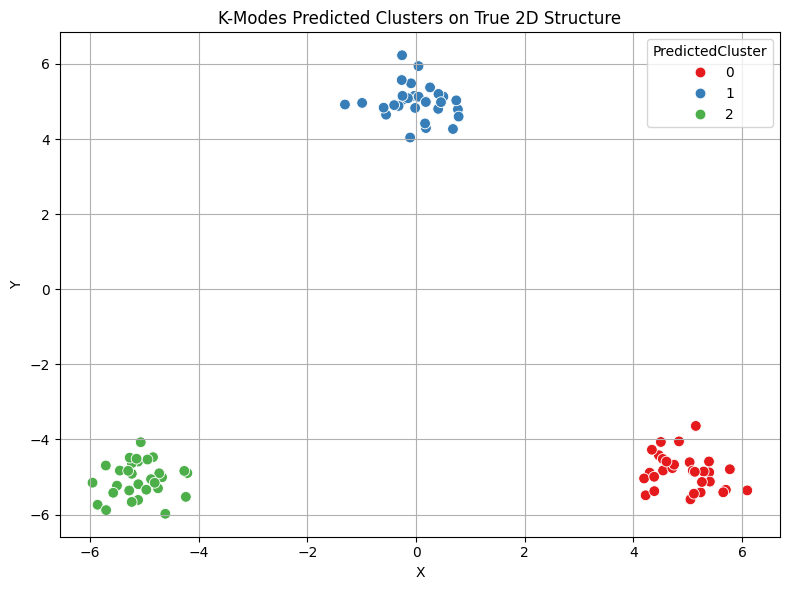

In [55]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulated categorical data with cluster structure
np.random.seed(42)

cluster_0 = pd.DataFrame({
    'Color': np.random.choice(['Red'], 30),
    'Shape': np.random.choice(['Circle'], 30),
    'Brand': np.random.choice(['A'], 30),
    'X': np.random.normal(-5, 0.5, 30),
    'Y': np.random.normal(-5, 0.5, 30),
    'TrueCluster': 0
})

cluster_1 = pd.DataFrame({
    'Color': np.random.choice(['Green'], 30),
    'Shape': np.random.choice(['Square'], 30),
    'Brand': np.random.choice(['B'], 30),
    'X': np.random.normal(0, 0.5, 30),
    'Y': np.random.normal(5, 0.5, 30),
    'TrueCluster': 1
})

cluster_2 = pd.DataFrame({
    'Color': np.random.choice(['Blue'], 30),
    'Shape': np.random.choice(['Triangle'], 30),
    'Brand': np.random.choice(['C'], 30),
    'X': np.random.normal(5, 0.5, 30),
    'Y': np.random.normal(-5, 0.5, 30),
    'TrueCluster': 2
})

df = pd.concat([cluster_0, cluster_1, cluster_2], ignore_index=True)
df.to_csv('kmodes_input_data.csv')
# Step 2: Fit K-Modes
X_cat = df[['Color', 'Shape', 'Brand']]
km = KModes(n_clusters=3, init='Cao', n_init=5, verbose=0)
df['PredictedCluster'] = km.fit_predict(X_cat)

# Step 3: Plot Predicted Clusters using X/Y
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='Y', hue='PredictedCluster', palette='Set1', s=60)
plt.title("K-Modes Predicted Clusters on True 2D Structure")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Define cluster patterns
clusters = [
    {
        "AgeGroup": "Teen",
        "Region": "North",
        "DeviceType": "Mobile",
        "PreferredTime": "Afternoon",
        "ProductType": "Apparel",
        "size": 100
    },
    {
        "AgeGroup": "Adult",
        "Region": "West",
        "DeviceType": "Desktop",
        "PreferredTime": "Morning",
        "ProductType": "Electronics",
        "size": 100
    },
    {
        "AgeGroup": "Senior",
        "Region": "South",
        "DeviceType": "Tablet",
        "PreferredTime": "Night",
        "ProductType": "Groceries",
        "size": 100
    }
]

# Create cluster-wise rows
records = []
for cluster_id, cluster in enumerate(clusters):
    for _ in range(cluster["size"]):
        record = {
            "AgeGroup": cluster["AgeGroup"],
            "Region": cluster["Region"],
            "DeviceType": cluster["DeviceType"],
            "PreferredTime": cluster["PreferredTime"],
            "ProductType": cluster["ProductType"],
            "TrueCluster": cluster_id
        }
        records.append(record)

df = pd.DataFrame(records)

# Add 5% noise (replace with random categories)
noise_count = int(len(df) * 0.05)
noise_indices = np.random.choice(df.index, size=noise_count, replace=False)

categories = {
    "AgeGroup": ["Teen", "Adult", "Senior"],
    "Region": ["North", "South", "East", "West"],
    "DeviceType": ["Mobile", "Desktop", "Tablet"],
    "PreferredTime": ["Morning", "Afternoon", "Night"],
    "ProductType": ["Electronics", "Apparel", "Groceries"]
}

for col in categories:
    df.loc[noise_indices, col] = np.random.choice(categories[col], size=noise_count)

# Shuffle
df = df.sample(frac=1).reset_index(drop=True)

# Save
df.to_csv("retail_customers_kmodes.csv", index=False)


In [83]:
# Read your CSV file
df = pd.read_csv("retail_customers_kmodes1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AgeGroup       300 non-null    object
 1   Region         300 non-null    object
 2   DeviceType     300 non-null    object
 3   PreferredTime  300 non-null    object
 4   ProductType    300 non-null    object
dtypes: object(5)
memory usage: 11.8+ KB


In [85]:
costs = []
K_range = range(1, 11)

for k in K_range:
    km = KModes(n_clusters=k, init="Cao", n_init=5, verbose=0)
    clusters = km.fit_predict(df)
    costs.append(km.cost_)

# Create Elbow Table with % drop
elbow_table = pd.DataFrame({
    "K": list(K_range),
    "Cost": costs
})
elbow_table["Drop"] = elbow_table["Cost"].diff().fillna(0)
elbow_table["% Drop"] = elbow_table["Drop"].abs() / elbow_table["Cost"].shift(1) * 100
elbow_table["% Drop"] = elbow_table["% Drop"].round(2).fillna(0)

print("\n📊 Elbow Table:\n", elbow_table)


📊 Elbow Table:
     K   Cost   Drop  % Drop
0   1  989.0    0.0    0.00
1   2  506.0 -483.0   48.84
2   3   31.0 -475.0   93.87
3   4   27.0   -4.0   12.90
4   5   25.0   -2.0    7.41
5   6   20.0   -5.0   20.00
6   7   17.0   -3.0   15.00
7   8   15.0   -2.0   11.76
8   9   13.0   -2.0   13.33
9  10   11.0   -2.0   15.38


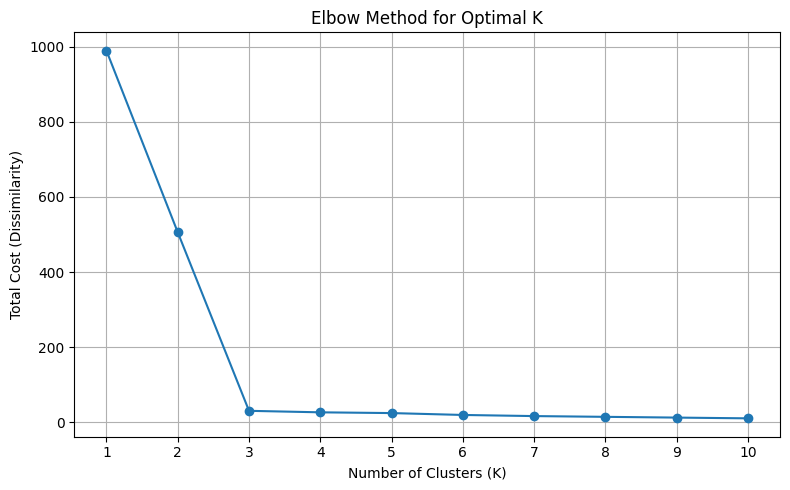

In [86]:
plt.figure(figsize=(8,5))
plt.plot(elbow_table["K"], elbow_table["Cost"], marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Total Cost (Dissimilarity)")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.savefig("elbow_kmodes_plot.png")
plt.show()


In [87]:
# Fit the model
km = KModes(n_clusters=3, init='Cao', n_init=5, verbose=0)
cluster_labels = km.fit_predict(df)

# Add cluster labels to the original DataFrame
df["Cluster"] = cluster_labels

In [88]:
df.head()

,AgeGroup,Region,DeviceType,PreferredTime,ProductType,Cluster
0,Teen,North,Mobile,Afternoon,Apparel,0
1,Senior,South,Tablet,Night,Groceries,1
2,Adult,West,Desktop,Morning,Electronics,2
3,Senior,South,Tablet,Night,Groceries,1
4,Teen,North,Mobile,Afternoon,Apparel,0


In [89]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score

# Encode categorical features numerically
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(df.drop(columns=["Cluster"]))

# Compute silhouette score using encoded features and cluster labels
sil_score = silhouette_score(X_encoded, df["Cluster"])

print(f"\n🧭 Silhouette Score (Ordinal Encoded): {sil_score:.4f}")



🧭 Silhouette Score (Ordinal Encoded): 0.9303


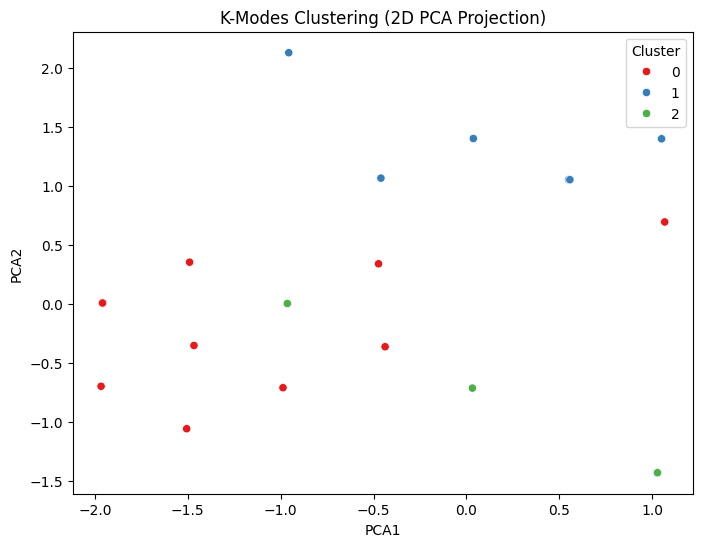

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use your X_encoded (ordinal encoded 5-feature input)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Step 2: Add PCA back to your DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Step 3: Plot clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set1")
plt.title("K-Modes Clustering (2D PCA Projection)")
plt.show()


In [91]:
cluster_modes = pd.DataFrame(km.cluster_centroids_, columns=df.columns[:-1])
cluster_modes['ClusterLabel'] = ['Cluster 0', 'Cluster 1', 'Cluster 2']
cluster_modes

,AgeGroup,Region,DeviceType,PreferredTime,ProductType,ClusterLabel
0,Teen,North,Mobile,Afternoon,Apparel,Cluster 0
1,Senior,South,Tablet,Night,Groceries,Cluster 1
2,Adult,West,Desktop,Morning,Electronics,Cluster 2
